In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

#read excel file
df = pd.read_excel('top250_anime.xlsx')


In [4]:
# view the top 10 anime by score
top10 = df.sort_values(by='Score', ascending=False).head(10)
print(top10[['Rank', 'Title', 'Score']])

   Rank                                              Title  Score
0     1  Shingeki no Kyojin: The Final Season - Kankets...   9.17
1     2                   Fullmetal Alchemist: Brotherhood   9.11
2     3                          Bleach: Sennen Kessen-hen   9.09
3     4                                        Steins;Gate   9.08
4     5                                           Gintama°   9.07
5     6         Kaguya-sama wa Kokurasetai: Ultra Romantic   9.06
6     7                 Shingeki no Kyojin Season 3 Part 2   9.06
7     8                                 Gintama: The Final   9.05
9    10                             Hunter x Hunter (2011)   9.04
8     9                                           Gintama'   9.04


In [5]:
# count the number of anime in each genre
genre_counts = df['Genre'].str.split(', ', expand=True).stack().value_counts()
print(genre_counts)

Drama              107
Action             101
Fantasy             60
Supernatural        59
Comedy              57
Adventure           47
Sci-Fi              45
Mystery             38
Romance             33
Slice of Life       27
Award Winning       27
Sports              22
Suspense            21
Horror               5
Avant Garde          3
Ecchi                2
Music                2
 Suspense            1
 Sci-Fi              1
 Action              1
Drama, Sports        1
Psychological        1
Drama, Suspense      1
Boys Love            1
dtype: int64


In [6]:
# view the top 10 studios by number of anime produced
top_studios = df['Studio'].value_counts().head(10)
print(top_studios)

Madhouse           15
Shaft              13
Kyoto Animation    11
Sunrise            11
Production I.G     10
ufotable           10
A-1 Pictures       10
Bones               9
MAPPA               8
Wit Studio          8
Name: Studio, dtype: int64


In [7]:
# calculate the average episode duration for each type of anime
type_duration = df.groupby('Type')['Duration'].mean()
print(type_duration)

Type
Movie      105.471698
Music        4.250000
ONA         21.700000
OVA         33.000000
Special     35.666667
TV          24.115854
Name: Duration, dtype: float64


In [8]:
# calculate the correlation between popularity and score
correlation = df[['Popularity', 'Score']].corr()
print(correlation)

            Popularity    Score
Popularity     1.00000 -0.23309
Score         -0.23309  1.00000


In [12]:
# sort the dataframe by 'Members' column in descending order
sorted_df = df.sort_values(by='Members', ascending=False)

# select the top 5 anime by Members
top_5_popularity = sorted_df.head(5)

# print the top 5 anime by Members
print(top_5_popularity[['Title', 'Members']])

                                Title    Members
110                Shingeki no Kyojin  3673536.0
81                         Death Note  3646544.0
1    Fullmetal Alchemist: Brotherhood  3109951.0
128                     One Punch Man  3001104.0
124                  Kimetsu no Yaiba  2723019.0


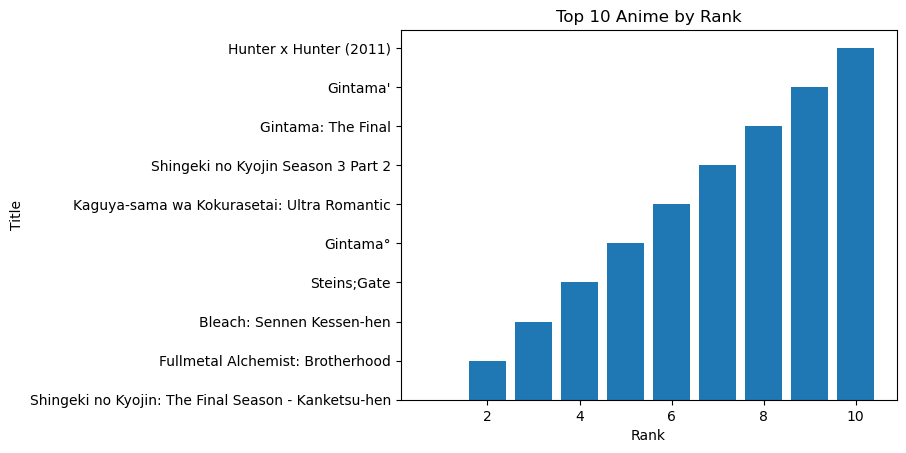

In [14]:
# plot the top 10 anime by rank
plt.bar(df['Rank'].head(10), df['Title'].head(10))
plt.xlabel('Rank')
plt.ylabel('Title')
plt.title('Top 10 Anime by Rank')
plt.show()

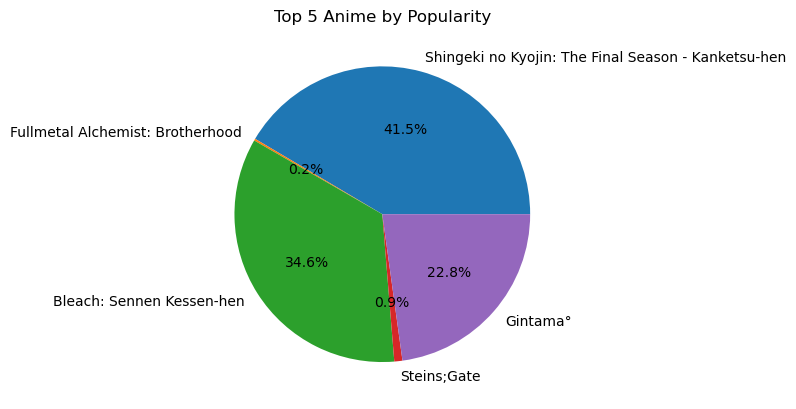

In [15]:
# plot the top 5 anime by popularity as a pie chart
plt.pie(df['Popularity'].head(5), labels=df['Title'].head(5), autopct='%1.1f%%')
plt.title('Top 5 Anime by Popularity')
plt.show()

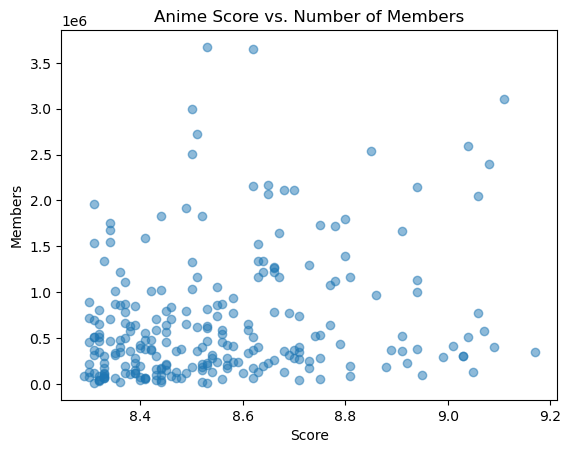

In [16]:
# plot anime score vs. number of members as a scatter plot
plt.scatter(df['Score'], df['Members'], alpha=0.5)
plt.xlabel('Score')
plt.ylabel('Members')
plt.title('Anime Score vs. Number of Members')
plt.show()

In [19]:
# filter the top 100 animes
top_100_animes = df.head(100)

# create an interactive scatter plot
fig = px.scatter(top_100_animes, x="Score", y="Popularity", color="Genre", hover_name="Title")

# customize the plot layout
fig.update_layout(title="Top 100 Anime: Score vs. Popularity", xaxis_title="Score", yaxis_title="Popularity")

# display the plot
fig.show()